In [12]:
from pathlib import Path

PROCESSED_DATASET_PATH_MNETV1_TRAIN = Path("../../../dataset/processed/train")
PROCESSED_DATASET_PATH_MNETV1_TEST = Path("../../../dataset/processed/test")
PROCESSED_DATASET_PATH_MNETV1_VAL = Path("../../../dataset/processed/val")

In [13]:
import os

train = {}
test = {}
val = {}


for class_ in os.listdir(PROCESSED_DATASET_PATH_MNETV1_TRAIN):
    train[class_] = len([x for x in os.listdir(f"{PROCESSED_DATASET_PATH_MNETV1_TRAIN}/{class_}") if x.endswith(".jpg")])


for class_ in os.listdir(PROCESSED_DATASET_PATH_MNETV1_TEST):
    test[class_] = len([x for x in os.listdir(f"{PROCESSED_DATASET_PATH_MNETV1_TEST}/{class_}") if x.endswith(".jpg")])

for class_ in os.listdir(PROCESSED_DATASET_PATH_MNETV1_VAL):
    val[class_] = len([x for x in os.listdir(f"{PROCESSED_DATASET_PATH_MNETV1_VAL}/{class_}") if x.endswith(".jpg")])

print(train, test, val)

{'antelope': 836, 'cow': 1070, 'deer': 1075, 'elephant': 830, 'giraffe': 961, 'horse': 1316, 'lion': 815, 'rabbit': 870, 'sheep': 1136, 'squirrel': 960, 'zebra': 936} {'antelope': 106, 'cow': 135, 'deer': 135, 'elephant': 105, 'giraffe': 121, 'horse': 165, 'lion': 103, 'rabbit': 110, 'sheep': 142, 'squirrel': 120, 'zebra': 117} {'antelope': 104, 'cow': 133, 'deer': 134, 'elephant': 103, 'giraffe': 120, 'horse': 164, 'lion': 101, 'rabbit': 108, 'sheep': 142, 'squirrel': 120, 'zebra': 117}


In [17]:
import numpy as np
data = {"y": []}
classes = []
for key in train.keys():
    data["y"].append(train[key] + val[key] + test[key])
    classes.append(key)

for k, v in data.items():
    data[k] = np.array(v)
print(data, classes)

{'y': array([1046, 1338, 1344, 1038, 1202, 1645, 1019, 1088, 1420, 1200, 1170])} ['antelope', 'cow', 'deer', 'elephant', 'giraffe', 'horse', 'lion', 'rabbit', 'sheep', 'squirrel', 'zebra']


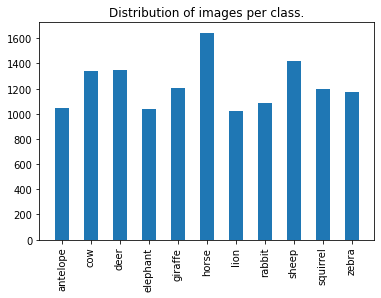

In [18]:
import numpy as np
import matplotlib.pyplot as plt

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(11)

for k, v in data.items():
    p = ax.bar(classes, v, width, label=k, bottom=bottom)
    bottom += v

ax.set_title("Distribution of images per class.")
# ax.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()